# Tarea 2 - Chi Cuadrado
## Verificación de números pseudoaleatorios

> Asignatura: Simulación<br/>
> Estudiante: Eduardo Zhizhpon

In [5]:
# Instalación de librerías (Python 3.10.4)
!pip install numpy==1.21.2
!pip install matplotlib==3.5.1

In [2]:
# Importación de librerías
import random
import numpy as np
import matplotlib.pyplot as plt

## Definición de Funciones

### Definición de funciones generadoras de números pseudoaleatorios

In [3]:
"""
    Generador de Cuadrados Medios
"""
def mean_squares(xo, digits, iterations):
    xn = xo
    rn_list = []
    for i in range(iterations):
        xnn = xn**2
        txnn = str(xnn).zfill(8)
        tam = len(txnn)
        ui = int(txnn[int(tam/2-digits/2):int(tam/2+digits/2)])
        rn = ui / (int('9'*digits)+1)
        rn_list.append(rn)
        xn = ui
    return rn_list

""" 
    Generador de Congruencia Lineal
"""
def linear_congruence(xo, a, b, m, iterations):
    xn = xo
    rn_list = []
    for i in range(iterations):
        xnn = (a*xn+b) % m
        ui = xnn/m
        rn_list.append(ui)
        xn = xnn
    return rn_list

"""
    Generador Tausworthe
"""
""" Generador Tausworthe - Obtiene los segmentos de bits """
def get_bits(b, current_idx, l):
    n = len(b)
    end_idx = current_idx + l
    next_idx = end_idx
    remaining = end_idx - n if end_idx > n else None
    if remaining:
        bits = b[current_idx: n] + b[0:remaining]
        next_idx = remaining
    else:
        bits = b[current_idx: end_idx]
    if next_idx >= n:
        next_idx = 0
    return (bits, next_idx)

""" Generador Tausworthe - Generación del conjunto de bits (b) """
def generate_bits(q, r, b_seed):
    period = 2**q - 1
    b = b_seed
    for i in range(q, period):
        b_n = int(b[i - r]) ^ int(b[i - q])
        b += str(b_n)
    return b

""" Generador Tausworthe - Generación de números aleatorios """
def tausworthe(q, r, l, b_seed, iterations):
    b = generate_bits(q, r, b_seed)
    idx = 0
    rn_list = []
    for i in range(iterations):
        bits, idx = get_bits(b, idx, l)
        dec = int(bits, 2)
        rn = dec/2**l
        rn_list.append(rn)
    return rn_list

"""
    Generador Random de Python
"""
def random_python(seed, iterations):
    random.seed(seed)
    return [random.random() for i in range(iterations)]

### Definición de la función para calcular Chi Cuadrado

In [4]:
""" Función para realizar el conteo de los números que están en cada
intervalo """
def chi_squared(numbers):
    tables = {}
    for i in np.arange(0.1, 1.1, 0.1):
        print()
        for j in numbers:
            if j > i-0.1 and j <= i:
                tables[round(i-0.1, 1)] = tables[round(i - 0.1, 1)] + 1 \
                    if round(i - 0.1, 1) in tables else 1
    return tables
""" Función para aplicar la fórmula y obtener la desviación estándar
de los intervalos """
def chi_sum(tables, E):
    return sum([(value - E)**2/E for value in tables.values()])

### Definición de la función para graficar Chi Cuadrado de los generadores de números pseudoaleatorios

In [5]:
def chi_plot(tables, title):
    fig = plt.figure(figsize=(6,6))
    axes = fig.add_subplot(1, 1, 1)
    axes.bar(range(len(tables)), list(tables.values()), 
             tick_label=list(tables.keys()), 
             edgecolor='black')
    axes.set_title(title)
    axes.set_xlabel('Cantidad de valoes')
    axes.set_ylabel('Intervalos')

    # Establece los valores a cada barra
    for bars in axes.containers:
        axes.bar_label(bars)

    fig.tight_layout()
    plt.show()

## Generación de números pseudoaleatorios

In [6]:
# Cantidad de iteraciones
iterations = 100

In [7]:
# Cuadrados Medios
xo = 74731897457
digits = 7
mean_squares_rn = mean_squares(xo, digits, iterations)

In [8]:
# Congruencia Lineal
xo = 7
a = 74731897457
b = 37747318974
m = 19
linear_congruence_rn = linear_congruence(xo, a, b, m, iterations)

In [9]:
# Tausworthe
q = 7
r = 3
l = 5
tausworthe_rn = tausworthe(q, r, l,'1'*q, iterations)

In [10]:
# Random de Python
seed = 11052022
random_python_rn = random_python(seed, iterations)

## Resultados y gráficas Chi Cuadrado de los generadores

In [21]:
# Definición de E 
E = iterations**(1/2)

### Cuadrados Medios

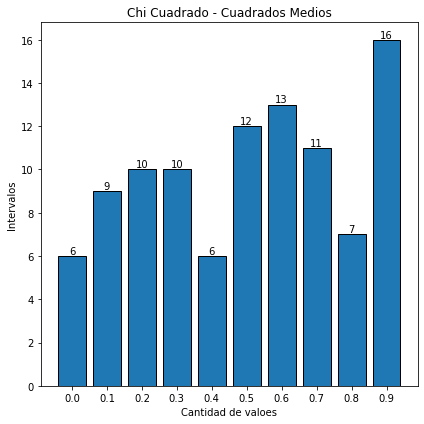

Valor de Chi Cuadrado = 9.200000000000001


In [24]:
tables = chi_squared(mean_squares_rn)
chi_value = chi_sum(tables, E)
chi_plot(tables, 'Chi Cuadrado - Cuadrados Medios')
print(f'Valor de Chi Cuadrado = {chi_value}')

### Congruencia Lineal

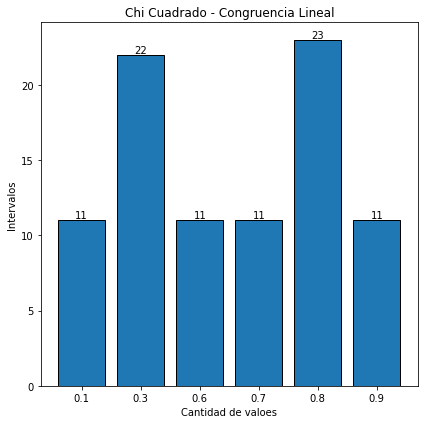

Valor de Chi Cuadrado = 31.7


In [13]:
tables = chi_squared(linear_congruence_rn)
chi_value = chi_sum(tables, E)
chi_plot(tables, 'Chi Cuadrado - Congruencia Lineal')
print(f'Valor de Chi Cuadrado = {chi_value}')

### Tausworthe

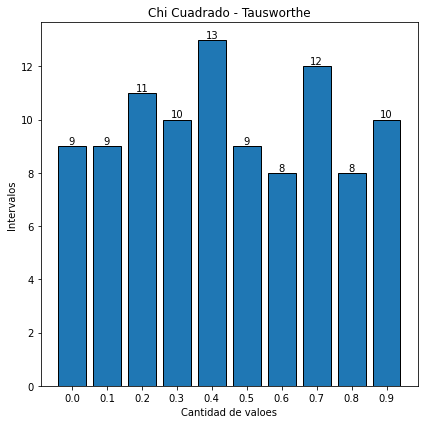

Valor de Chi Cuadrado = 2.5


In [17]:
tables = chi_squared(tausworthe_rn)
chi_value = chi_sum(tables, E)
chi_plot(tables, 'Chi Cuadrado - Tausworthe')
print(f'Valor de Chi Cuadrado = {chi_value}')

### Random de Python

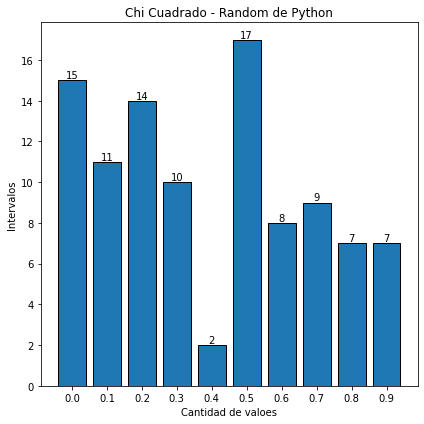

Valor de Chi Cuadrado = 17.8


In [15]:
tables = chi_squared(random_python_rn)
chi_value = chi_sum(tables, E)
chi_plot(tables, 'Chi Cuadrado - Random de Python')
print(f'Valor de Chi Cuadrado = {chi_value}')